# **Import Dependencies and Create Data Bunch**

In [116]:
import numpy as np
!curl -s https://course.fast.ai/setup/colab | bash   #To update packages and the course repo.
  #Colab terminates your instance after 90 minutes of idle time or after 12 hours of runtime (see here). This script will check if your instance has been terminated and install packages and clone repository again if it has. If it has not (you have been away for less than 90 minutes) the script will just update the packages and repository.

Updating fastai...
Done.


In [0]:
#If your notebook has these cells in the top you should delete them before you start working:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [119]:
path = untar_data(URLs.PETS);
path

PosixPath('/content/data/oxford-iiit-pet')

In [120]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [121]:
path.ls()

[PosixPath('/content/data/oxford-iiit-pet/annotations'),
 PosixPath('/content/data/oxford-iiit-pet/images'),
 PosixPath('/content/data/oxford-iiit-pet/models')]

In [0]:
path_anno = path / 'annotations'	#Creates a path for annotations
path_img = path / 'images'

In [123]:
fnames = get_image_files(path_img) #fastai function to get image files.
fnames[:10]

[PosixPath('/content/data/oxford-iiit-pet/images/japanese_chin_126.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/samoyed_10.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/basset_hound_165.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/beagle_92.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/english_setter_100.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/Abyssinian_92.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/Birman_162.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/chihuahua_135.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/yorkshire_terrier_181.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/chihuahua_84.jpg')]

In [0]:
#label_names = get(path_anno)

In [0]:
np.random.seed(1)
pattern = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pattern, ds_tfms = get_transforms(), size = 224)  #Use bs = 48 if you run out of memory and it works fine on a 11GB Graphics RAM.

In [127]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
japanese_chin,samoyed,basset_hound,beagle,english_setter
Path: /content/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,miniature_pinscher,scottish_terrier,British_Shorthair,newfoundland
Path: /content/data/oxford-iiit-pet/images;

Test: None

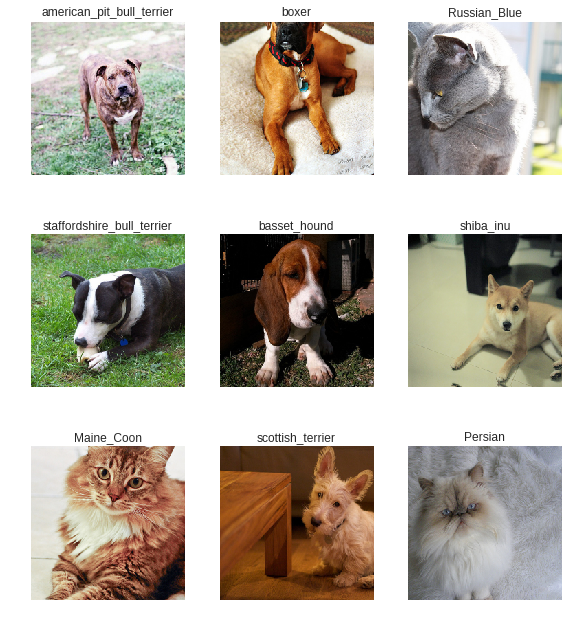

In [128]:
data.show_batch(rows = 3, figsize = (8, 9))

In [129]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

# Model Training, Testing and Interpretation

In [130]:
learn = create_cnn(data, models.resnet50, metrics = error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [131]:
learn.fit_one_cycle(6) #Default Learning Rate = 0.003

epoch,train_loss,valid_loss,error_rate,time
0,0.956226,0.282280,0.085927,02:16
1,0.451482,0.255600,0.079838,02:16
2,0.297786,0.219948,0.073748,02:18
3,0.233110,0.195035,0.062246,02:21
4,0.157945,0.181102,0.054804,02:19
5,0.135882,0.180355,0.060893,02:18


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

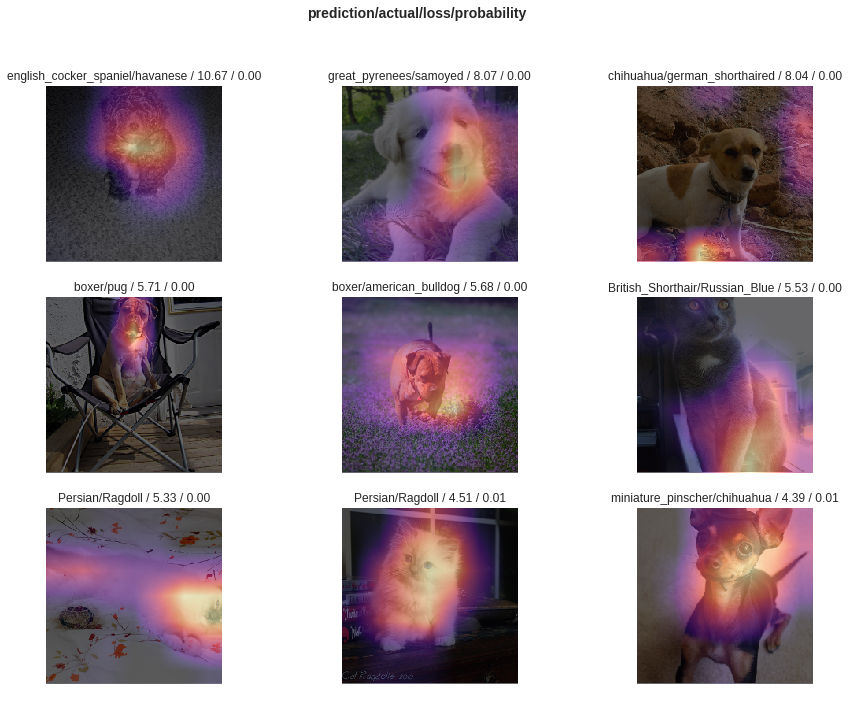

In [134]:
interp.plot_top_losses(9, figsize = (15, 11))

In [135]:
doc(interp.plot_top_losses)

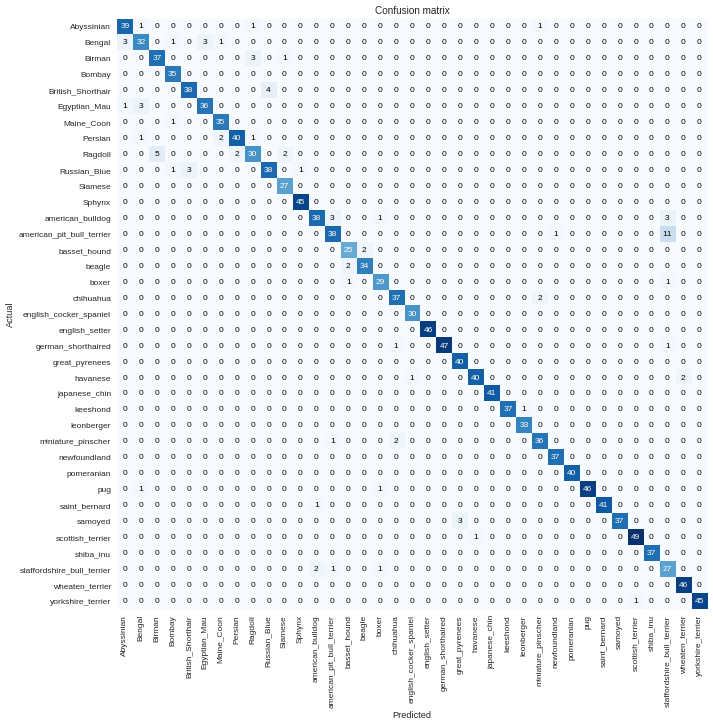

In [136]:
interp.plot_confusion_matrix(figsize = (12, 12), dpi = 60)

In [137]:
interp.most_confused(min_val = 2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 11),
 ('Ragdoll', 'Birman', 5),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Birman', 'Ragdoll', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('Persian', 'Maine_Coon', 2),
 ('Ragdoll', 'Persian', 2),
 ('Ragdoll', 'Siamese', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('havanese', 'wheaten_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
learn.unfreeze()

In [139]:
learn.fit_one_cycle(6)  #Default Learning Rate = 0.003

epoch,train_loss,valid_loss,error_rate,time
0,0.236754,0.571190,0.158322,02:29
1,0.531538,0.815509,0.214479,02:28
2,0.454022,0.517346,0.156292,02:29
3,0.286082,0.338048,0.108931,02:28
4,0.153284,0.245967,0.074425,02:27
5,0.077357,0.238259,0.069012,02:28


In [140]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
japanese_chin,samoyed,basset_hound,beagle,english_setter
Path: /content/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,miniature_pinscher,scottish_terrier,British_Shorthair,newfoundland
Path: /content/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), 

In [141]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


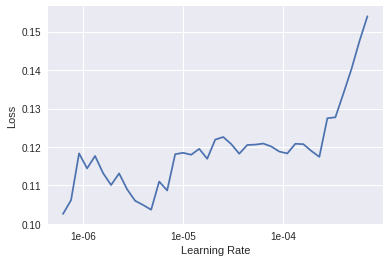

In [142]:
learn.recorder.plot()  #This shows that we have to put our learning rate <0.0001 but by default it is 0.003 and because of that we got our loss worse before.

In [0]:
learn.unfreeze()

In [144]:
learn.fit_one_cycle(5, max_lr = slice(1e-6, 1e-4))  #Learning Rate varing from 1e-6 at first layer to 1e-4 at last layer.

epoch,train_loss,valid_loss,error_rate,time
0,0.104133,0.180029,0.056834,02:28
1,0.109912,0.180479,0.055480,02:27
2,0.098269,0.175785,0.058187,02:27
3,0.080801,0.171496,0.055480,02:27
4,0.070595,0.169673,0.053451,02:28


In [0]:
learn.save('stage-2')

# Prediction - Inference

In [146]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [0]:
classes = ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [0]:
#from fastai import *
#fastai.defaults.device = torch.device('cpu')

In [0]:
#data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms = get_transforms(), size = 224)   #Changed tfms to ds_tfms

In [0]:
#data2.normalize(imagenet_stats)

In [0]:
###data2.show_batch(rows = 3, figsize = (8, 9))

In [0]:
#learnPred = cnn_learner(data2, models.resnet50)

In [0]:
###learnPred.load('stage-1')

In [0]:
img = open_image(path_img/'japanese_chin_126.jpg')

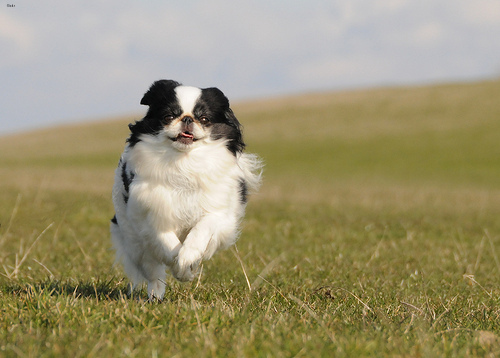

In [155]:
img

In [0]:
pred_class, pred_idx, outputs = learn.predict(img)

In [157]:
pred_class

Category japanese_chin

In [158]:
pred_idx

tensor(23)

In [159]:
classes[23]

'japanese_chin'

In [160]:
outputs

tensor([3.7336e-06, 8.0741e-06, 6.6716e-05, 1.2680e-05, 7.6896e-05, 5.8096e-05,
        4.5499e-04, 9.9187e-04, 1.3828e-02, 2.8013e-06, 6.5339e-07, 3.5186e-05,
        3.6307e-05, 8.0738e-06, 1.8352e-05, 1.3866e-04, 4.7252e-05, 1.6820e-05,
        4.0127e-04, 5.5183e-04, 6.0855e-05, 6.2396e-04, 8.4580e-04, 9.7935e-01,
        3.3899e-06, 1.1598e-05, 2.2758e-05, 1.7389e-05, 1.5922e-05, 9.5857e-05,
        2.0739e-03, 5.9422e-05, 1.5855e-05, 2.8797e-05, 7.0188e-06, 1.9002e-06,
        7.6130e-06])

In [0]:
#We have Achieved an Accuracy of 94.6% which is equal to an Error rate of 5.4% using ResNet50 Architecture.